<a href="https://colab.research.google.com/github/pheb2014939/App_VT/blob/main/DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


Index(['Unnamed: 0', 'Flow ID', 'Destination IP', 'Init_Win_bytes_forward',
       'Source IP', 'Source Port', 'Init_Win_bytes_backward', 'Flow IAT Min',
       'Flow Duration', 'Flow IAT Max', 'Flow IAT Mean', 'Flow Packets/s',
       'Fwd Packets/s', 'Fwd IAT Min', 'Fwd IAT Total', 'Fwd IAT Max',
       'Fwd IAT Mean', 'Bwd Packets/s', 'Destination Port'],
      dtype='object')
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 96.52%
Precision: 98.05%
Recall: 98.05%
F1 Score: 98.05%
Confusion Matrix:
[[ 7225  1362]
 [ 1363 68457]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      8587
           1       0.98      0.98      0.98     69820

    accuracy                           0.97     78407
   macro avg       0.91      0.91      0.91     78407
weighted avg       0.97      0.97      0.97     

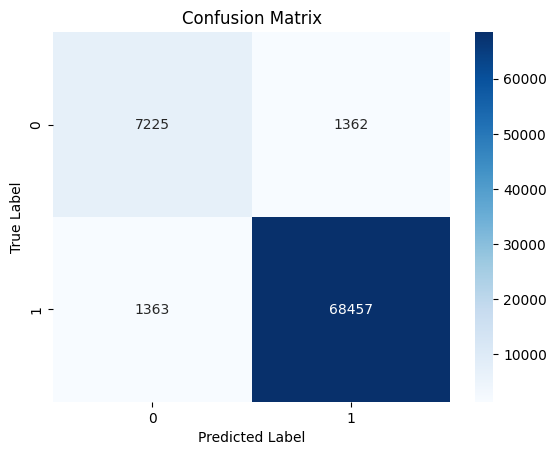

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Load the dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset1.csv'
df = pd.read_csv(path)

X = df.drop('Label', axis=1)
y = df['Label']

# Select top 19 important features using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

# Get feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Select top 19 features
top_19_features = feat_importances.nlargest(19).index
X_selected = X[top_19_features]
print(X_selected.columns)

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')

# Train the model with GridSearch
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Predict using the best model from Grid Search
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 96.49%
Precision: 98.03%
Recall: 98.04%
F1 Score: 98.03%
Confusion Matrix:
[[ 7209  1378]
 [ 1371 68449]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      8587
           1       0.98      0.98      0.98     69820

    accuracy                           0.96     78407
   macro avg       0.91      0.91      0.91     78407
weighted avg       0.96      0.96      0.96     78407



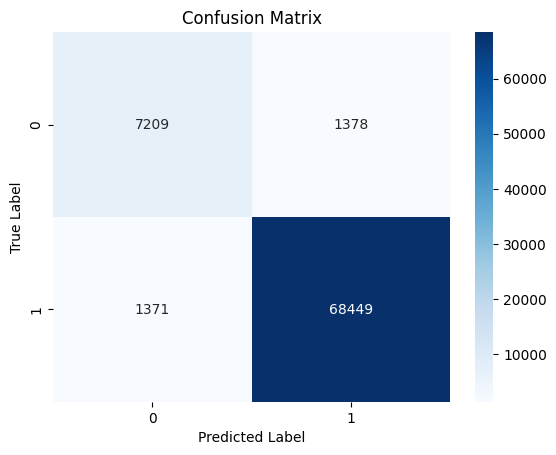

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset1.csv'
df = pd.read_csv(path)

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model with max_depth, min_samples_split, and min_samples_leaf
clf = DecisionTreeClassifier(  random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate the model on the test set with precision, recall, f1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
